# Genre recognition: experiment

Goal: Test the influence of the graph Laplacian type.

Conclusion: The normalized Laplacian provides better accuracy (~3%).

Observations:

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'laplacian'
Pvalues = ['normalized', 'unnormalized', 'normalized', 'unnormalized']

# Regenerate the graph or the features at each iteration.
regen_graph = True
regen_features = True
regen_baseline = False

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['data_scaling_graph'] = 'features'
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'euclidean'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 10
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5
p['majority_voting'] = False

### Data parameters

In [3]:
# HDF5 data stores.
p['folder'] = 'data'
p['filename_gtzan'] = 'gtzan.hdf5'
p['filename_audio'] = 'audio.hdf5'
p['filename_graph'] = 'graph.hdf5'
p['filename_features'] = 'features.hdf5'

# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Added white noise.
p['noise_std'] = 0

### Numerical parameters

In [4]:
# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-5  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['test_size'] = 0.1
p['Ncv'] = 20
p['dataset_classification'] = 'Z'

## Processing

In [5]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms_D']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph, laplacian = normalized -------------------- 

Data: (149000, 96), float32
Elapsed time: 216.73 seconds
All self-referenced in the first column: True
dist in [0.0, 1.72983384132]
w in [0.00189454166684, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2359600,), float32
  L_indices : (2359600,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2359600,), float32
  W_indices : (2359600,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = euclidean
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 225.98 seconds

 -------------------- Features, laplacian = normalized -------------------- 

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full datas

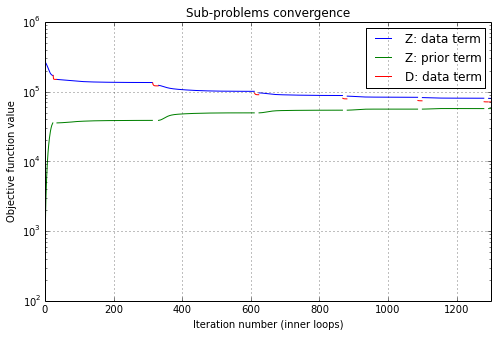

Inner loop: 1302 iterations
g(Z) = ||X-DZ||_2^2 = 7.104504e+04
rdiff: 0.000143436189521
i(Z) = ||Z||_1 = 5.698367e+04
j(Z) = tr(Z^TLZ) = 8.738621e+03


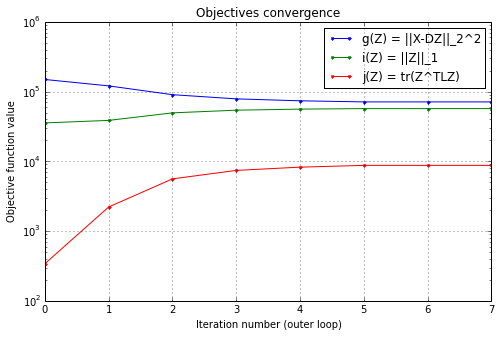

Global objective: 1.367673e+05


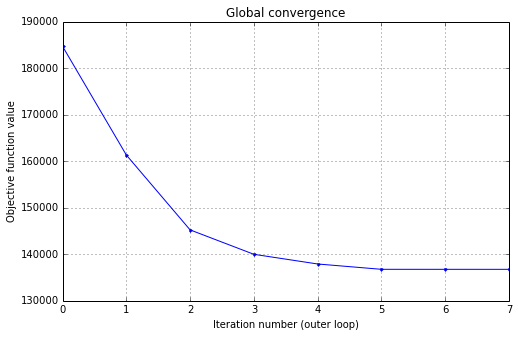

Outer loop: 8 iterations

Z in [-0.172690629959, 1.08530604839]
Sparsity of Z: 3,702,669 non-zero entries out of 19,072,000 entries, i.e. 19.4%.


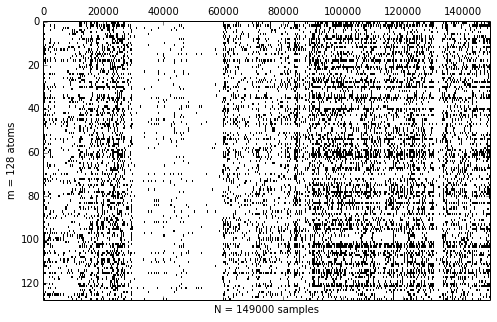

D in [-0.027598535642, 0.895244240761]
d in [0.999999582767, 1.00000035763]
Constraints on D: True


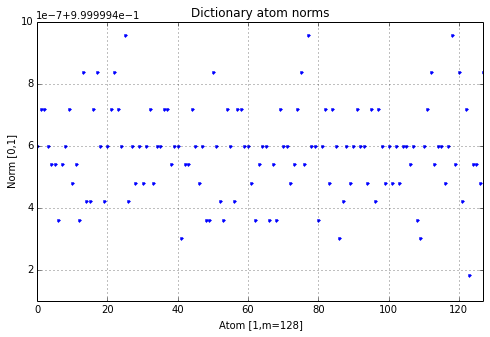

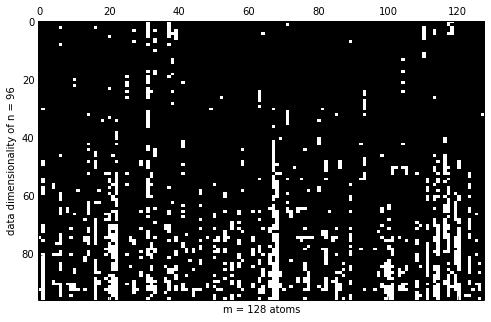

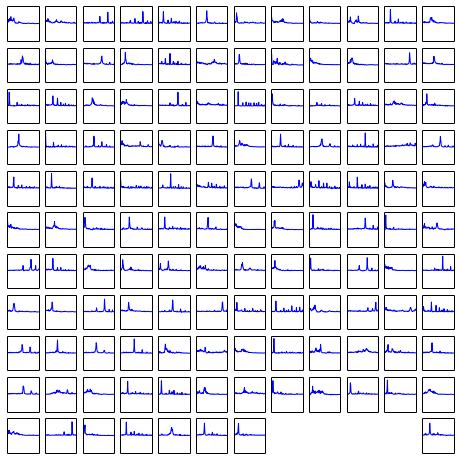

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2741 seconds

 -------------------- Classification, laplacian = normalized -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N

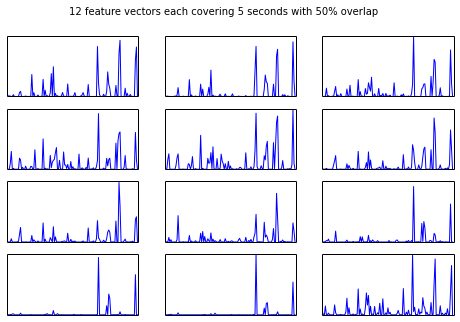

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.5 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  77 (+/- 1.8) <- [78 76 76 77 72 77 74 79 78 77]
  78 (+/- 1.8) <- [77 78 78 75 81 77 80 76 78 80]
  78 (+/- 1.4) <- [78 77 80 76 79 80 77 78 79 76]
  78 (+/- 1.9) <- [77 73 78 79 78 79 79 76 80 78]
  79 (+/- 0.7) <- [78 78 78 78 78 79 78 78 80 77]
  79 (+/- 1.6) <- [80 79 78 80 81 81 77 80 77 78]
  78 (+/- 1.4) <- [80 78 79 78 78 75 80 77 76 78]
  78 (+/- 1.7) <- [74 78 81 77 77 79 79 76 76 77]
  79 (+/- 1.0) <- [7

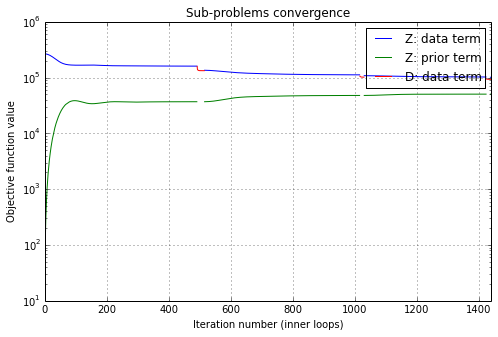

Inner loop: 1441 iterations
g(Z) = ||X-DZ||_2^2 = 9.315121e+04
rdiff: 0.000746224531602
i(Z) = ||Z||_1 = 5.053609e+04
j(Z) = tr(Z^TLZ) = 8.245592e+03


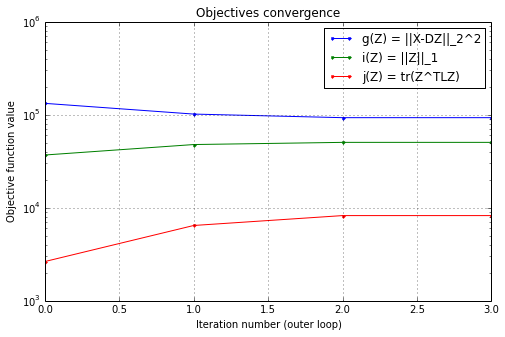

Global objective: 1.519329e+05


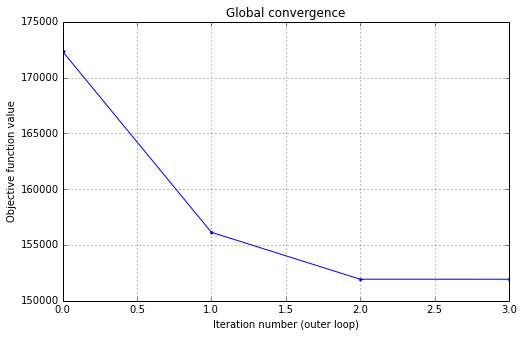

Outer loop: 4 iterations

Z in [-0.1504381001, 0.431620627642]
Sparsity of Z: 6,688,349 non-zero entries out of 19,072,000 entries, i.e. 35.1%.


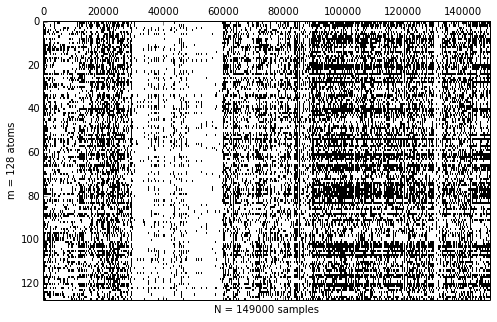

D in [-0.068669103086, 0.870086312294]
d in [0.999999642372, 1.00000035763]
Constraints on D: True


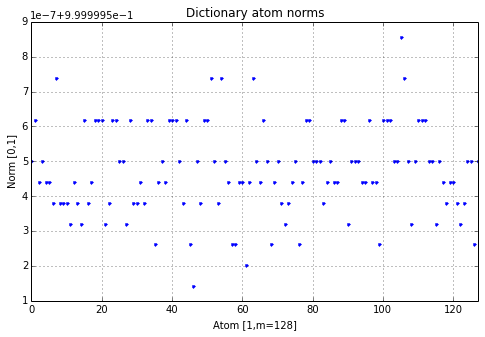

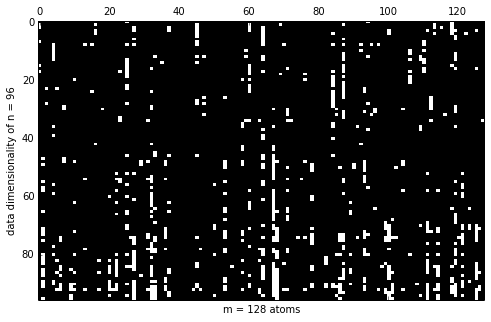

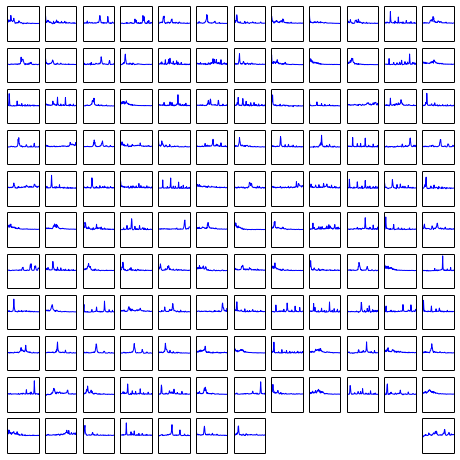

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 3153 seconds

 -------------------- Classification, laplacian = unnormalized -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size:

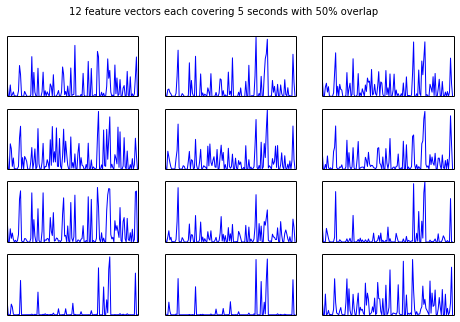

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 72.6 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.0 %
Clips accuracy: 71.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  74 (+/- 2.0) <- [73 72 75 76 69 75 75 73 74 74]
  74 (+/- 2.3) <- [73 74 73 68 77 75 72 75 73 75]
  75 (+/- 1.6) <- [76 75 76 76 74 76 74 71 77 74]
  74 (+/- 2.1) <- [75 68 76 74 74 76 75 74 74 73]
  74 (+/- 1.3) <- [75 72 72 73 73 74 75 72 75 73]
  75 (+/- 1.6) <- [74 73 74 76 75 78 75 77 73 74]
  74 (+/- 1.0) <- [73 73 73 74 74 73 72 72 75 75]
  74 (+/- 1.7) <- [74 74 73 75 71 78 72 73 73 72]
  75 (+/- 1.9) <- [7

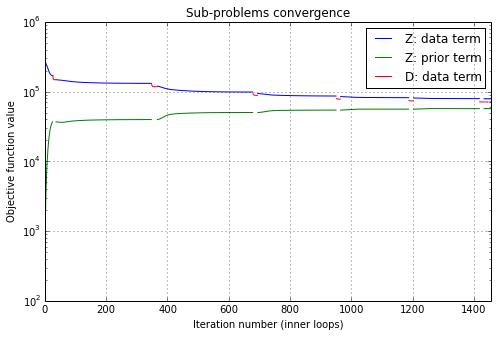

Inner loop: 1458 iterations
g(Z) = ||X-DZ||_2^2 = 7.079712e+04
rdiff: 0.000297394692829
i(Z) = ||Z||_1 = 5.690532e+04
j(Z) = tr(Z^TLZ) = 7.918162e+03


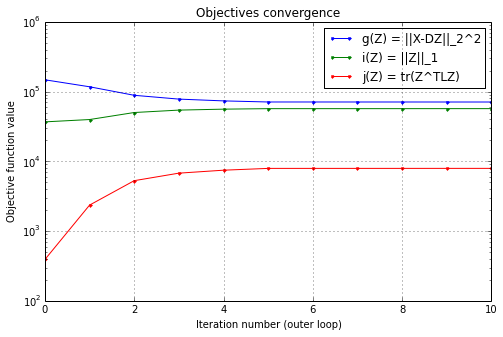

Global objective: 1.356206e+05


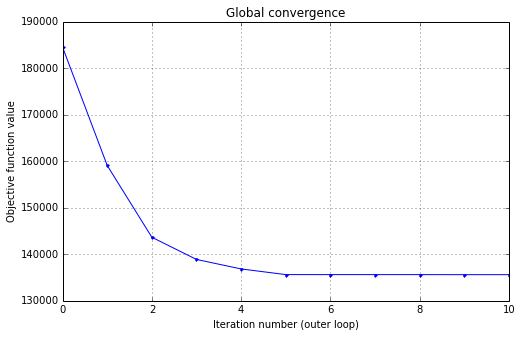

Outer loop: 11 iterations

Z in [-0.157225385308, 1.02839124203]
Sparsity of Z: 3,731,115 non-zero entries out of 19,072,000 entries, i.e. 19.6%.


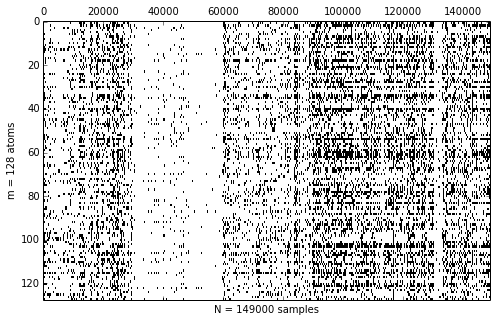

D in [-0.0245641116053, 0.89549434185]
d in [0.999999642372, 1.00000035763]
Constraints on D: True


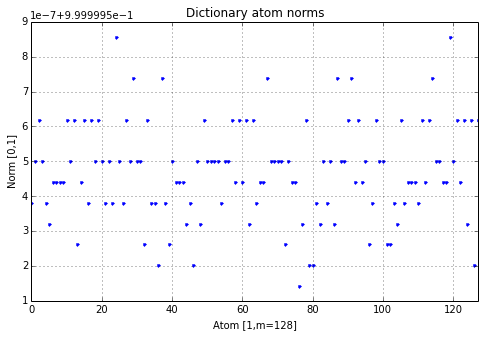

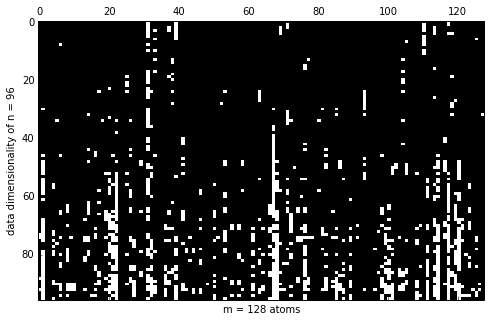

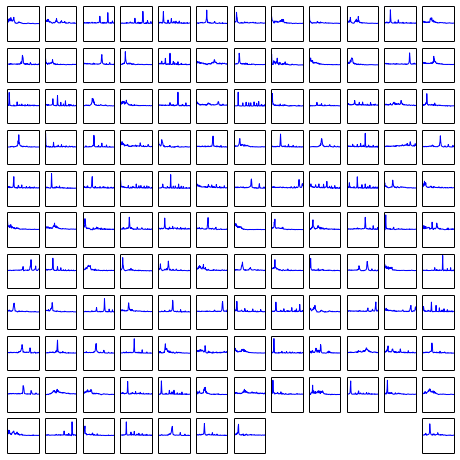

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 3180 seconds

 -------------------- Classification, laplacian = normalized -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N

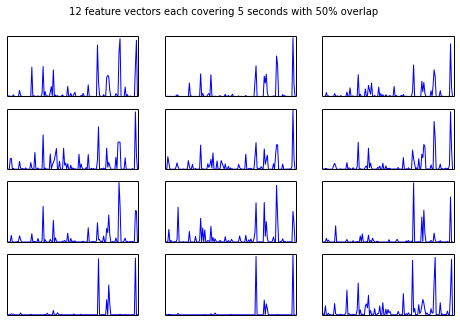

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.4 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.5 %
Clips accuracy: 71.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  76 (+/- 2.2) <- [77 75 76 77 70 76 74 77 78 77]
  78 (+/- 1.7) <- [77 76 77 73 78 76 80 78 76 79]
  78 (+/- 1.2) <- [79 78 78 76 78 79 77 76 78 75]
  77 (+/- 2.0) <- [79 71 75 77 78 76 77 76 77 76]
  77 (+/- 1.2) <- [77 76 77 77 76 78 79 75 78 75]
  78 (+/- 1.4) <- [78 77 76 79 77 80 75 78 76 79]
  77 (+/- 1.5) <- [79 76 76 78 77 74 79 75 78 77]
  77 (+/- 1.6) <- [76 75 78 77 76 80 75 75 75 77]
  78 (+/- 1.2) <- [7

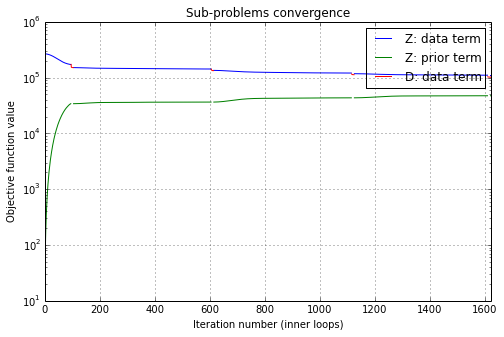

Inner loop: 1624 iterations
g(Z) = ||X-DZ||_2^2 = 1.020493e+05
rdiff: 0.000117322325577
i(Z) = ||Z||_1 = 4.728914e+04
j(Z) = tr(Z^TLZ) = 6.951408e+03


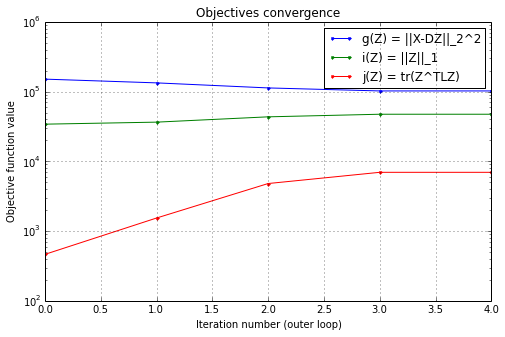

Global objective: 1.562898e+05


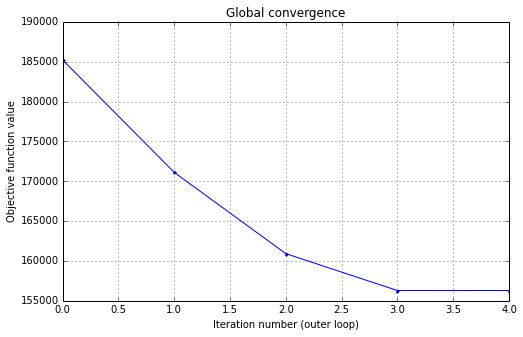

Outer loop: 5 iterations

Z in [-0.0730217769742, 0.239454746246]
Sparsity of Z: 7,842,042 non-zero entries out of 19,072,000 entries, i.e. 41.1%.


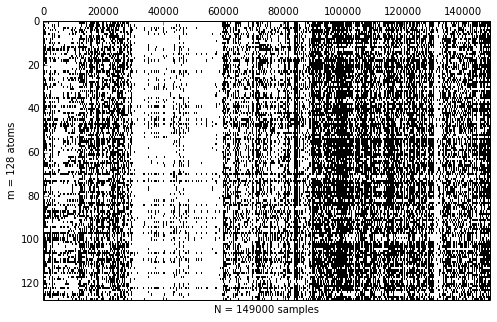

D in [-0.0284309070557, 0.800033926964]
d in [0.999999523163, 1.00000035763]
Constraints on D: True


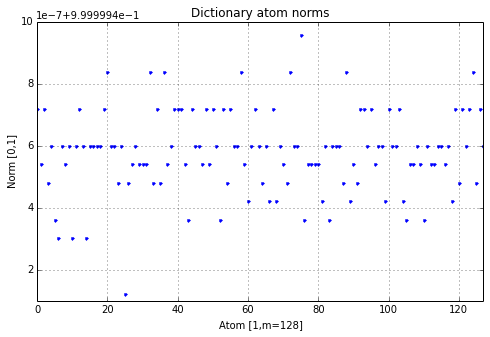

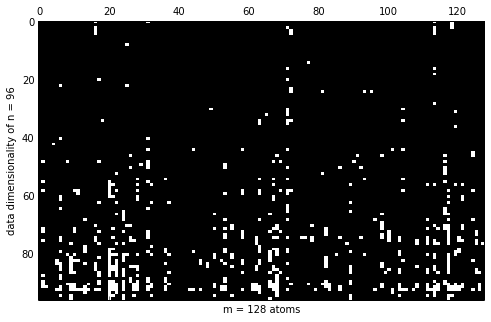

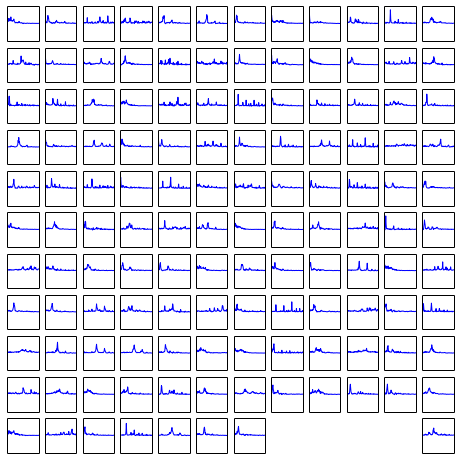

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 3652 seconds

 -------------------- Classification, laplacian = unnormalized -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size:

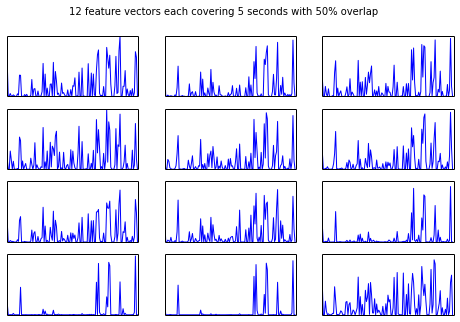

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 70.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.0 %
Clips accuracy: 67.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  72 (+/- 1.8) <- [73 70 71 70 68 73 72 70 73 73]
  72 (+/- 1.7) <- [71 73 72 68 74 73 70 73 70 71]
  72 (+/- 2.2) <- [73 75 73 70 72 75 71 68 73 70]
  72 (+/- 2.4) <- [72 65 73 73 72 74 73 71 71 71]
  71 (+/- 1.3) <- [73 69 72 71 70 72 70 70 72 69]
  74 (+/- 1.1) <- [74 73 74 73 74 75 73 74 72 71]
  72 (+/- 1.3) <- [73 72 71 73 73 69 70 71 71 72]
  72 (+/- 1.3) <- [70 72 72 71 69 74 70 70 71 72]
  72 (+/- 1.3) <- [7

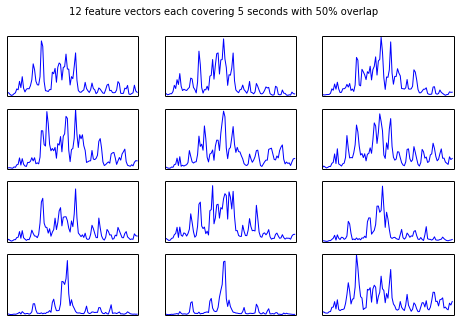

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  69 (+/- 2.2) <- [70 68 71 67 64 67 70 68 72 66]
  69 (+/- 1.4) <- [71 68 67 67 72 69 67 70 69 70]
  70 (+/- 2.0) <- [71 69 73 68 68 71 71 68 71 66]
  69 (+/- 1.4) <- [70 67 66 67 67 70 68 70 70 68]
  70 (+/- 2.4) <- [71 69 72 68 70 75 71 68 68 66]
  71 (+/- 0.7) <- [71 71 70 70 71 71 70 69 70 70]
  70 (+/- 1.4) <- [70 68 72 69 69 67 71 69 70 69]
  70 (+/- 1.5) <- [69 70 68 71 65 70 70 69 70 69]
  69 (+/- 1.7) <- [68 6

In [6]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        p['filename_features'] = 'features_{}_{}.hdf5'.format(Pname, p[Pname])
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if regen_baseline:
    res['baseline'] = []
    res['baseline_std'] = []
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
        res['baseline'].append(accuracy)
        res['baseline_std'].append(accuracy_std)
else:
    separator('Baseline')
    %run audio_classification.ipynb
    res['baseline'] = len(Pvalues) * [accuracy]
    res['baseline_std'] = accuracy_std

## Results

laplacian = ['normalized', 'unnormalized', 'normalized', 'unnormalized']
res['accuracy_std'] = [1.6699758813960304, 1.8111826630378531, 1.7384282092996781, 1.775878303826024]
res['objective_j'] = [8738.6207580566406, 8245.5917358398438, 7918.1617736816406, 6951.4076232910156]
res['objective_i'] = [56983.671875, 50536.09375, 56905.32421875, 47289.140625]
res['objective_h'] = [0, 0, 0, 0]
res['objective_g'] = [71045.0390625, 93151.2109375, 70797.119140625, 102049.2578125]
res['baseline'] = [69.729166666666742, 69.729166666666742, 69.729166666666742, 69.729166666666742]
res['time_features'] = [2733.9047298431396, 3144.330353975296, 3170.067512989044, 3640.6458139419556]
res['baseline_std'] = 1.71029866625
res['sparsity'] = [19.414162122483223, 35.06894400167785, 19.563312709731544, 41.118089345637586]
res['iterations_inner'] = [1302, 1441, 1458, 1624]
res['iterations_outer'] = [8, 4, 11, 5]
res['accuracy'] = [78.341666666666683, 74.339166666666699, 77.310833333333335, 71.877500000000055]


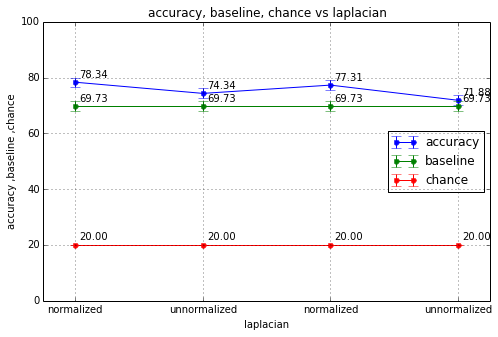

/usr/lib/python2.7/dist-packages/numpy/ma/core.py:3847: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


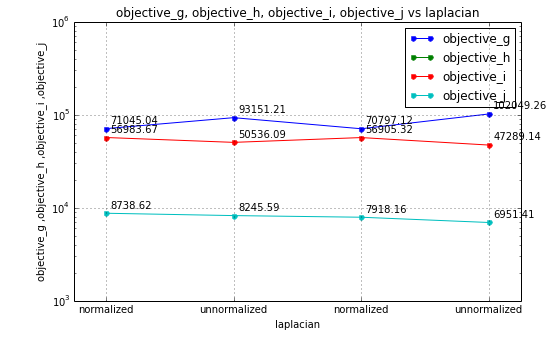

g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)


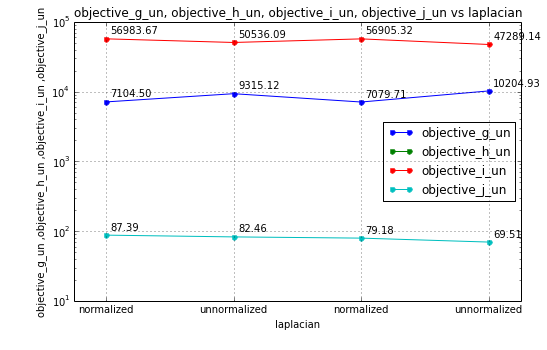

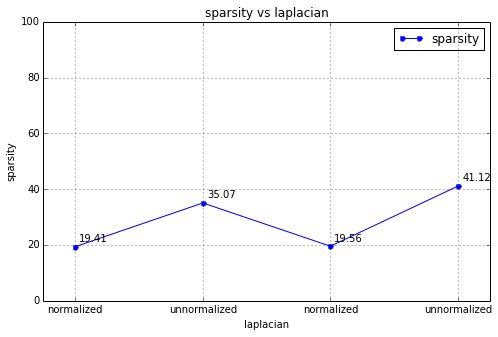

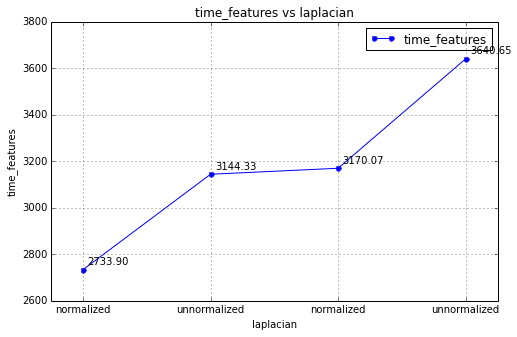

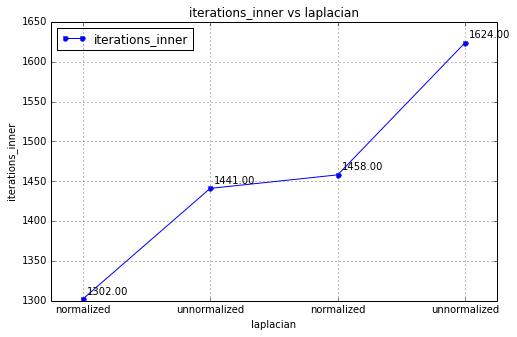

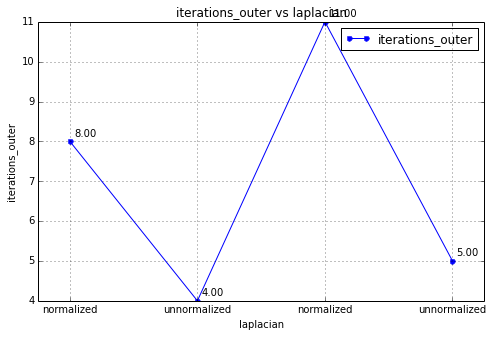

Dictionary atoms for laplacian = normalized
Dictionary atoms for laplacian = unnormalized
Dictionary atoms for laplacian = normalized
Dictionary atoms for laplacian = unnormalized
Experiment time: 15549 seconds


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [7]:
print('{} = {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms_D':
        print('res[\'{}\'] = {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    if 'ylim' in kwargs:
        plt.ylim(kwargs['ylim'])
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

def div(l):
    div = Pvalues if Pname is l else [p[l]]
    return np.array([1 if v is None else v for v in div])

# Classification results.
res['chance'] = len(Pvalues) * [100./p['Ngenres']]
res['chance_std'] = 0
err=['accuracy_std', 'baseline_std', 'chance_std']
plot('accuracy', 'baseline', 'chance', err=err, ylim=[0,100])

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_h', 'objective_i', 'objective_j', log=True)
    # Unweighted objectives.
    print('g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)')
    res['objective_g_un'] = res['objective_g'] / div('ld')
    res['objective_h_un'] = res['objective_h'] / div('le')
    res['objective_i_un'] = res['objective_i'] / div('ls')
    res['objective_j_un'] = res['objective_j'] / div('lg')
    plot('objective_g_un', 'objective_h_un', 'objective_i_un', 'objective_j_un', log=True)
    plot('sparsity', ylim=[0,100])
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms_D']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))